In [1]:
import cv2
import numpy as np
import os

import datetime
from skimage import io
import os
import random
import matplotlib.pyplot as plt
%matplotlib inline
import glob

In [2]:
def segment(image, threshold=25):
    global bg
    # find the absolute difference between background and current frame
    diff = cv2.absdiff(bg.astype("uint8"), image)

    # threshold the diff image so that we get the foreground
    thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

    # get the contours in the thresholded image
    (cnts, _) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # return None, if no contours detected
    if len(cnts) == 0:
        return
    else:
        # based on contour area, get the maximum contour which is the hand
        segmented = max(cnts, key=cv2.contourArea)
        return (thresholded, segmented)

PART 2 - Train and predict hand gesture with 2D CNN Model
Now, Having segmented the hand region from the live video sequence, we do the following:
Create a 2D Convolutional Neural Network Model using keras
Train the CNN model using the different gestures dataset
Get the thresholded image from live feed and use model to predict the hand gesture in image
2D CNN Model

In [3]:
import keras

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.optimizers import Adam




In [4]:
# model
model = Sequential()

# first conv layer
# input shape = (img_rows, img_cols, 1)
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100,120, 1))) 
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# second conv layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# flatten and put a fully connected layer
model.add(Flatten())
model.add(Dense(128, activation='relu')) # fully connected
model.add(Dropout(0.5))

# softmax layer
model.add(Dense(6, activation='softmax'))

# model summary
optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 118, 32)       320       
                                                                 
 batch_normalization (Batch  (None, 98, 118, 32)       128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 49, 59, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 49, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 57, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 47, 57, 64)       

Training the model with the dataset

In [5]:
# Loading the Dataset

DATASET_PATH = r"C:\Users\rajen\Downloads\archive (2)"

dataset_path = os.path.join(DATASET_PATH, '*')
import glob
dataset_path = glob.glob(dataset_path)
dataset_path

['C:\\Users\\rajen\\Downloads\\archive (2)\\data']

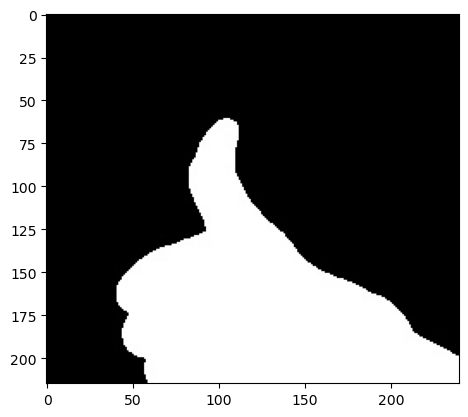

In [6]:
cat = cv2.imread(r"C:\Users\rajen\Downloads\archive (2)\data\thumbsup\thumbsup999.jpg")
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

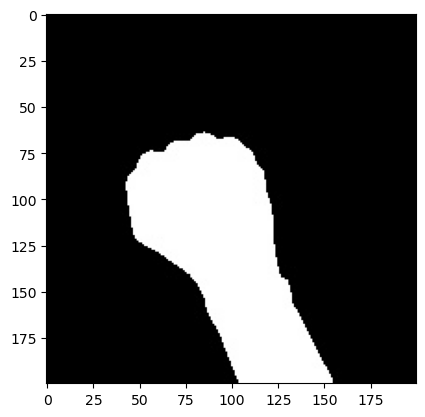

In [7]:


cat = cv2.imread(r"C:\Users\rajen\Downloads\archive (2)\data\fist\hand0(98).jpg")
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

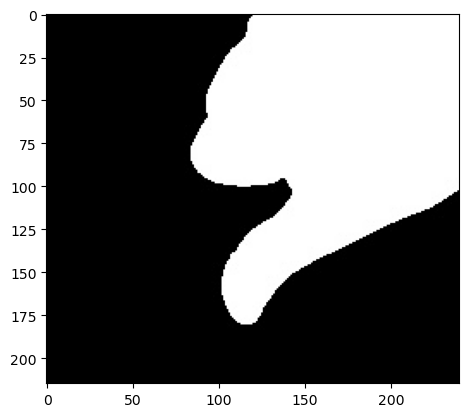

In [8]:
cat = cv2.imread(r"C:\Users\rajen\Downloads\archive (2)\data\thumbsdown\thumbsdown996.jpg")
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

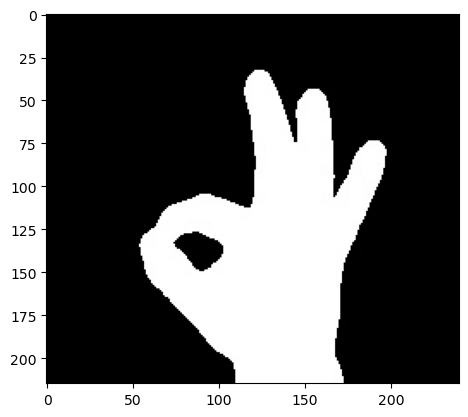

In [9]:
cat = cv2.imread(r"C:\Users\rajen\Downloads\archive (2)\data\ok\ok98.jpg")
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

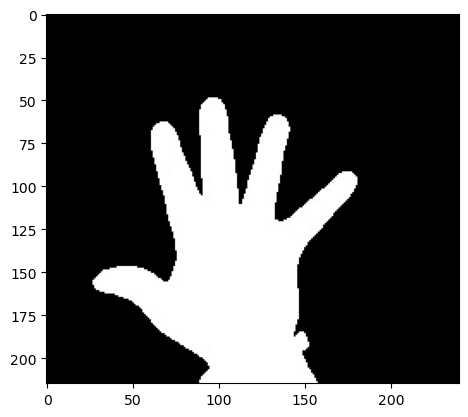

In [10]:
cat = cv2.imread(r"C:\Users\rajen\Downloads\archive (2)\data\five\wade998.jpg")
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

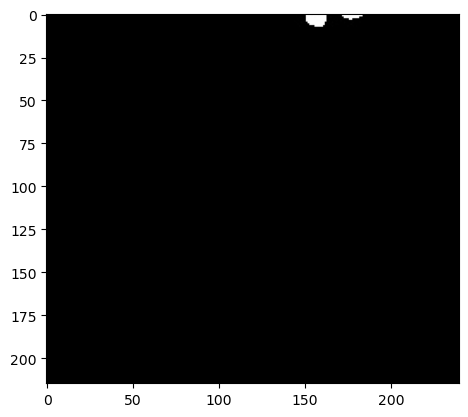

In [11]:
cat = cv2.imread(r"C:\Users\rajen\Downloads\archive (2)\data\blank\sdfrg88.jpg")
plt.imshow(cv2.cvtColor(cat, cv2.COLOR_BGR2RGB))

In [12]:

import cv2


DATASET_PATH = r"C:\Users\rajen\Downloads\archive (2)"
list_of_gestures = ['blank', 'ok', 'thumbsup', 'thumbsdown', 'fist', 'five']

loaded_images = []

for gesture in list_of_gestures:
    gesture_path = os.path.join(DATASET_PATH, 'data', gesture, '*')
    gest_path = glob.glob(gesture_path)
    k = 0
    for i in range(0, len(gest_path)):
        if k < 1600:
            image = cv2.imread(gest_path[i])
            gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            gray_image = cv2.resize(gray_image, (100, 120))
            loaded_images.append(gray_image)
            k += 1

print(len(loaded_images))

outputVectors = []
for i in range(1, 1601):
    outputVectors.append([1, 0, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 1, 0, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 1, 0, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 1, 0, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 1, 0])

for i in range(1, 1601):
    outputVectors.append([0, 0, 0, 0, 0, 1])

print(len(outputVectors))


9600
9600


In [13]:
X = np.asarray(loaded_images)
y = np.asarray(outputVectors)
print(X.shape)
print(y.shape)

(9600, 120, 100)
(9600, 6)


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train = X_train.reshape(X_train.shape[0], 100, 120, 1)
X_test = X_test.reshape(X_test.shape[0], 100, 120, 1)
print(X_train.shape)
print(X_test.shape)

(7680, 100, 120, 1)
(1920, 100, 120, 1)


In [15]:
# Training the model with data
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))

# model.save("hand_gesture_recognition.h5")

Epoch 1/10


60/60 [==============================] - 89s 1s/step - loss: 1.7790 - categorical_accuracy: 0.7555 - val_loss: 0.4785 - val_categorical_accuracy: 0.8974
Epoch 2/10
60/60 [==============================] - 101s 2s/step - loss: 0.2819 - categorical_accuracy: 0.8632 - val_loss: 0.1231 - val_categorical_accuracy: 0.9557
Epoch 3/10
60/60 [==============================] - 94s 2s/step - loss: 0.1829 - categorical_accuracy: 0.9128 - val_loss: 0.0418 - val_categorical_accuracy: 0.9958
Epoch 4/10
60/60 [==============================] - 91s 2s/step - loss: 0.1455 - categorical_accuracy: 0.9333 - val_loss: 0.0308 - val_categorical_accuracy: 0.9932
Epoch 5/10
60/60 [==============================] - 91s 2s/step - loss: 0.1056 - categorical_accuracy: 0.9497 - val_loss: 0.0089 - val_categorical_accuracy: 0.9984
Epoch 6/10
60/60 [==============================] - 96s 2s/step - loss: 0.1126 - categorical_accuracy: 0.9529 - val_loss: 0.0086 - val_categorical_accuracy: 0.9990
Epoch 7/10
60

In [16]:
[loss, acc] = model.evaluate(X_test,y_test,verbose=1)
print("Accuracy: " + str(acc))

60/60 [==============================] - 6s 93ms/step - loss: 0.0370 - categorical_accuracy: 0.9990
Accuracy: 0.9989583492279053


Get the thresholded image from live feed and use model to predict the hand gesture in image

In [17]:
model.save("hand_gesture_recog_model.h5")

C:\Users\rajen\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [18]:
# transfer learning

In [19]:
from keras.applications import MobileNet
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Load MobileNet pre-trained on ImageNet data
base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(100, 120, 3))  

# Freeze the layers of the pre-trained model
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers for your specific classification task
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
optimiser = Adam() 
model.compile(optimizer=optimiser, loss='categorical_crossentropy', metrics=['categorical_accuracy'])

# Summary of the model
model.summary()

# Assuming X_train and X_test are in shape (batch_size, 100, 120, 1)
# You need to convert them to (batch_size, 100, 120, 3) as MobileNet expects 3 channels
X_train_rgb = np.repeat(X_train, 3, -1)
X_test_rgb = np.repeat(X_test, 3, -1)

# Train the model
model.fit(X_train_rgb, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test_rgb, y_test))

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100, 120, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 50, 60, 32)        864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 50, 60, 32)        128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 50, 60, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 50, 60, 32)        288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 50, 60, 32)        128   

                                                                 
 conv_dw_8 (DepthwiseConv2D  (None, 6, 7, 512)         4608      
 )                                                               
                                                                 
 conv_dw_8_bn (BatchNormali  (None, 6, 7, 512)         2048      
 zation)                                                         
                                                                 
 conv_dw_8_relu (ReLU)       (None, 6, 7, 512)         0         
                                                                 
 conv_pw_8 (Conv2D)          (None, 6, 7, 512)         262144    
                                                                 
 conv_pw_8_bn (BatchNormali  (None, 6, 7, 512)         2048      
 zation)                                                         
                                                                 
 conv_pw_8_relu (ReLU)       (None, 6, 7, 512)         0         
          

Epoch 8/10
60/60 [==============================] - 51s 849ms/step - loss: 0.0184 - categorical_accuracy: 0.9953 - val_loss: 0.0139 - val_categorical_accuracy: 0.9974
Epoch 9/10
60/60 [==============================] - 51s 848ms/step - loss: 0.0163 - categorical_accuracy: 0.9964 - val_loss: 0.0134 - val_categorical_accuracy: 0.9979
Epoch 10/10
60/60 [==============================] - 50s 837ms/step - loss: 0.0134 - categorical_accuracy: 0.9969 - val_loss: 0.0133 - val_categorical_accuracy: 0.9984


In [20]:
# Assuming you have already trained the model and have X_test_rgb and y_test
# Evaluate the model on the test set
evaluation = model.evaluate(X_test_rgb, y_test, verbose=1)

# Extract and print the evaluation metrics
loss = evaluation[0]
accuracy = evaluation[1]

print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy * 100:.2f}%')


60/60 [==============================] - 12s 187ms/step - loss: 0.0133 - categorical_accuracy: 0.9984
Test Loss: 0.0133
Test Accuracy: 99.84%


In [21]:
from sklearn.metrics import classification_report
import numpy as np

# Assuming you have already trained the model and have X_test_rgb and y_test
# Predict the classes on the test set
y_pred = model.predict(X_test_rgb)

# Convert one-hot encoded labels back to class indices
y_true_labels = np.argmax(y_test, axis=1)
y_pred_labels = np.argmax(y_pred, axis=1)

# Generate and print the classification report
class_names = ["Class_0", "Class_1", "Class_2", "Class_3", "Class_4", "Class_5"]  # Replace with your actual class names
report = classification_report(y_true_labels, y_pred_labels, target_names=class_names)

print("Classification Report:")
print(report)


60/60 [==============================] - 12s 185ms/step
Classification Report:
              precision    recall  f1-score   support

     Class_0       1.00      1.00      1.00       315
     Class_1       1.00      1.00      1.00       312
     Class_2       1.00      1.00      1.00       341
     Class_3       1.00      1.00      1.00       334
     Class_4       1.00      1.00      1.00       324
     Class_5       0.99      1.00      0.99       294

    accuracy                           1.00      1920
   macro avg       1.00      1.00      1.00      1920
weighted avg       1.00      1.00      1.00      1920



60/60 [==============================] - 11s 181ms/step


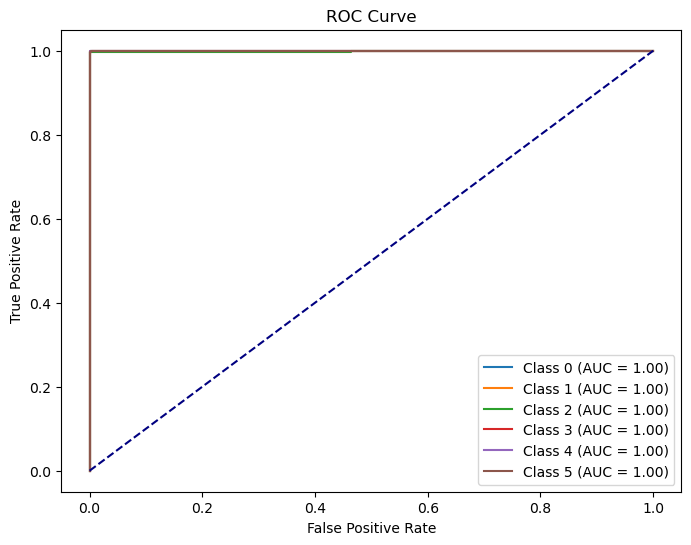

In [22]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np


y_scores = model.predict(X_test_rgb)


fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(6):  
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_scores[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))

for i in range(6):  
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
